In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_ASL_path = "E:\ELEC872_project\\archive\output\dataset"

In [3]:
labels = os.listdir(train_ASL_path)

labels = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]

all_img = []
all_label = []

for label in labels:
    print(label)
    imgs = [f for f in os.listdir(train_ASL_path + '\\' + label + '\\lit\\') if f.endswith('.png')]
    print(len(imgs))
    for img in imgs:
        data = cv2.imread(train_ASL_path + '\\' + label + '\\lit\\' + img)
        #print(data.shape)
        #cv2.imshow('image', data)
        data = cv2.resize(data, (128,128))
        all_img.append(data)
        all_label.append(label)
    print("size of this label:", len(all_img))

a
1001
size of this label: 1001
b
1001
size of this label: 2002
c
1001
size of this label: 3003
d
1001
size of this label: 4004
e
1001
size of this label: 5005
f
1001
size of this label: 6006
g
1001
size of this label: 7007
h
1001
size of this label: 8008
i
1001
size of this label: 9009
j
1001
size of this label: 10010
k
1001
size of this label: 11011
l
1001
size of this label: 12012
m
1001
size of this label: 13013
n
1001
size of this label: 14014
o
1001
size of this label: 15015
p
1001
size of this label: 16016
q
1001
size of this label: 17017
r
1001
size of this label: 18018
s
1001
size of this label: 19019
t
1001
size of this label: 20020
u
1001
size of this label: 21021
v
1001
size of this label: 22022
w
1001
size of this label: 23023
x
1001
size of this label: 24024
y
1001
size of this label: 25025
z
1001
size of this label: 26026


In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
def OneHotEncoding(labels):
    # convert array
    labels = np.array(labels)
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(labels)
    print(integer_encoded)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

y = OneHotEncoding(all_label)

[ 0  0  0 ... 25 25 25]


In [5]:
all_img = np.array(all_img)
all_img = all_img.astype('float32')/255.0

In [6]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(all_img,np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [23]:
import keras
from time import time
from keras import utils
from keras import regularizers
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization
from keras.applications import VGG16
from keras.callbacks import EarlyStopping, ModelCheckpoint

classes = 26
batch = 64
epochs = 20
learning_rate = 0.0001

def create_model():
    #adam = Adam(lr = learning_rate)
    
    model = Sequential()

    model.add(VGG16(weights = 'imagenet', include_top = False, input_shape = (128,128,3)))
    
    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))

    model.add(Dense(26, activation = 'softmax'))

    #start = time()
    #train_time = time() - start
    
    model.compile(optimizer = 'sgd', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

    model.summary()
    return model

In [24]:
model=create_model()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 4, 512)         2048      
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_9 (Dense)              (None, 26)                13338     
Total params: 18,924,890
Trainable params: 18,923,866
Non-trainable params: 1,024
_________________________________________________________________


In [25]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.00001) 
mc = ModelCheckpoint('872_best_model_VGG16.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [26]:
#Train and Test The Model

history=model.fit(x_tr, y_tr ,epochs=20, callbacks=[es,mc], batch_size=64, validation_data=(x_val,y_val))

Epoch 1/20
326/326 [==============================] - 61s 185ms/step - loss: 2.9624 - accuracy: 0.4011 - val_loss: 2.3667 - val_accuracy: 0.5265

Epoch 00001: val_accuracy improved from -inf to 0.52651, saving model to 872_best_model_VGG16.hdf5
Epoch 2/20
326/326 [==============================] - 60s 185ms/step - loss: 1.1628 - accuracy: 0.9185 - val_loss: 1.1256 - val_accuracy: 0.9337

Epoch 00002: val_accuracy improved from 0.52651 to 0.93373, saving model to 872_best_model_VGG16.hdf5
Epoch 3/20
326/326 [==============================] - 61s 186ms/step - loss: 1.0341 - accuracy: 0.9550 - val_loss: 1.0457 - val_accuracy: 0.9514

Epoch 00003: val_accuracy improved from 0.93373 to 0.95140, saving model to 872_best_model_VGG16.hdf5
Epoch 4/20
326/326 [==============================] - 61s 186ms/step - loss: 0.9946 - accuracy: 0.9645 - val_loss: 1.0310 - val_accuracy: 0.9485

Epoch 00004: val_accuracy did not improve from 0.95140
Epoch 5/20
326/326 [==============================] - 61s 

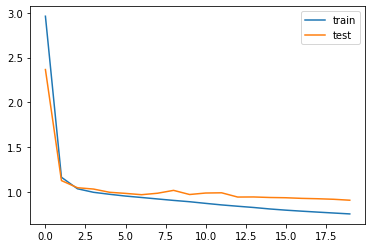

In [27]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

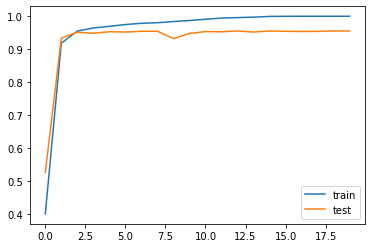

In [28]:
pyplot.plot(history.history['accuracy'], label='train') 
pyplot.plot(history.history['val_accuracy'], label='test') 
pyplot.legend()
pyplot.show()